<a href="https://colab.research.google.com/github/priyanka36/MLProblems/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor 

In [3]:
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q : sqldf(q,globals())

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=5cf2cb98b53b7d43bb1d09b8e4bd712a414ee29222c8bea7797278b357e91f7b
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [4]:
orders = pd.read_csv("/content/restaurant-1-orders.csv")

In [5]:
orders

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6


In [6]:
orders.dtype

AttributeError: ignored

In [7]:
dir(orders)

['Quantity',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_

In [9]:
orders.dtypes

Order Number        int64
Order Date         object
Item Name          object
Quantity            int64
Product Price     float64
Total products      int64
dtype: object

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [13]:
orders.columns = ['number', 'timestamp', 'item', 'quantity', 'price', 'total_products_in_cart']

In [15]:
orders.dtypes

number                      int64
timestamp                  object
item                       object
quantity                    int64
price                     float64
total_products_in_cart      int64
dtype: object

In [17]:
orders.head()


,number,timestamp,item,quantity,price,total_products_in_cart
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [18]:
orders["date"] = pd.to_datetime(orders["timestamp"].str[:10])

In [19]:
orders.head()

,number,timestamp,item,quantity,price,total_products_in_cart,date
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6,2019-03-08
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6,2019-03-08
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6,2019-03-08
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6,2019-03-08
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6,2019-03-08


In [20]:
dir(orders)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [22]:
help(orders.nunique)

Help on method nunique in module pandas.core.frame:

nunique(axis=0, dropna=True) -> pandas.core.series.Series method of pandas.core.frame.DataFrame instance
    Count distinct observations over requested axis.
    
    Return Series with number of distinct observations. Can ignore NaN
    values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis to use. 0 or 'index' for row-wise, 1 or 'columns' for
        column-wise.
    dropna : bool, default True
        Don't include NaN in the counts.
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.nunique: Method nunique for Series.
    DataFrame.count: Count non-NA cells for each column or row.
    
    Examples
    --------
    >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
    >>> df.nunique()
    A    3
    B    1
    dtype: int64
    
    >>> df.nunique(axis=1)
    0    1
    1    2
    2    2
    dtype: int64



In [23]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df.nunique()

A    3
B    1
dtype: int64

In [24]:
df.head()

,A,B
0,1,1
1,2,1
2,3,1


In [25]:
def load_query(path):
  with open(path) as file:
    return file.read()


In [26]:
dir(load_query)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [27]:
help(load_query)

Help on function load_query in module __main__:

load_query(path)



In [32]:
query = load_query("/content/daily_orders.sql")

In [33]:
query

'WITH distinct_orders AS (\n\tSELECT DISTINCT\n\t\tnumber,\n\t\tDATE(date) AS date\n\tFROM orders\n)\n\nSELECT \n\tdate,\n\tCOUNT(*) AS num_orders \nFROM distinct_orders\nGROUP BY 1\nORDER BY 1'

In [34]:
daily_orders = pysqldf(query)

In [35]:
orders[distinct_orders]

NameError: ignored

In [38]:
daily_orders

,date,num_orders
0,2015-01-09,1
1,2015-01-10,7
2,2015-02-10,5
3,2015-08-09,3
4,2015-09-09,6
...,...,...
1202,2019-12-03,11
1203,2019-12-04,25
1204,2019-12-05,23
1205,2019-12-06,9


In [39]:
daily_orders.head(5)

,date,num_orders
0,2015-01-09,1
1,2015-01-10,7
2,2015-02-10,5
3,2015-08-09,3
4,2015-09-09,6


In [40]:
daily_orders.tail(5)

,date,num_orders
1202,2019-12-03,11
1203,2019-12-04,25
1204,2019-12-05,23
1205,2019-12-06,9
1206,2019-12-07,18


In [41]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

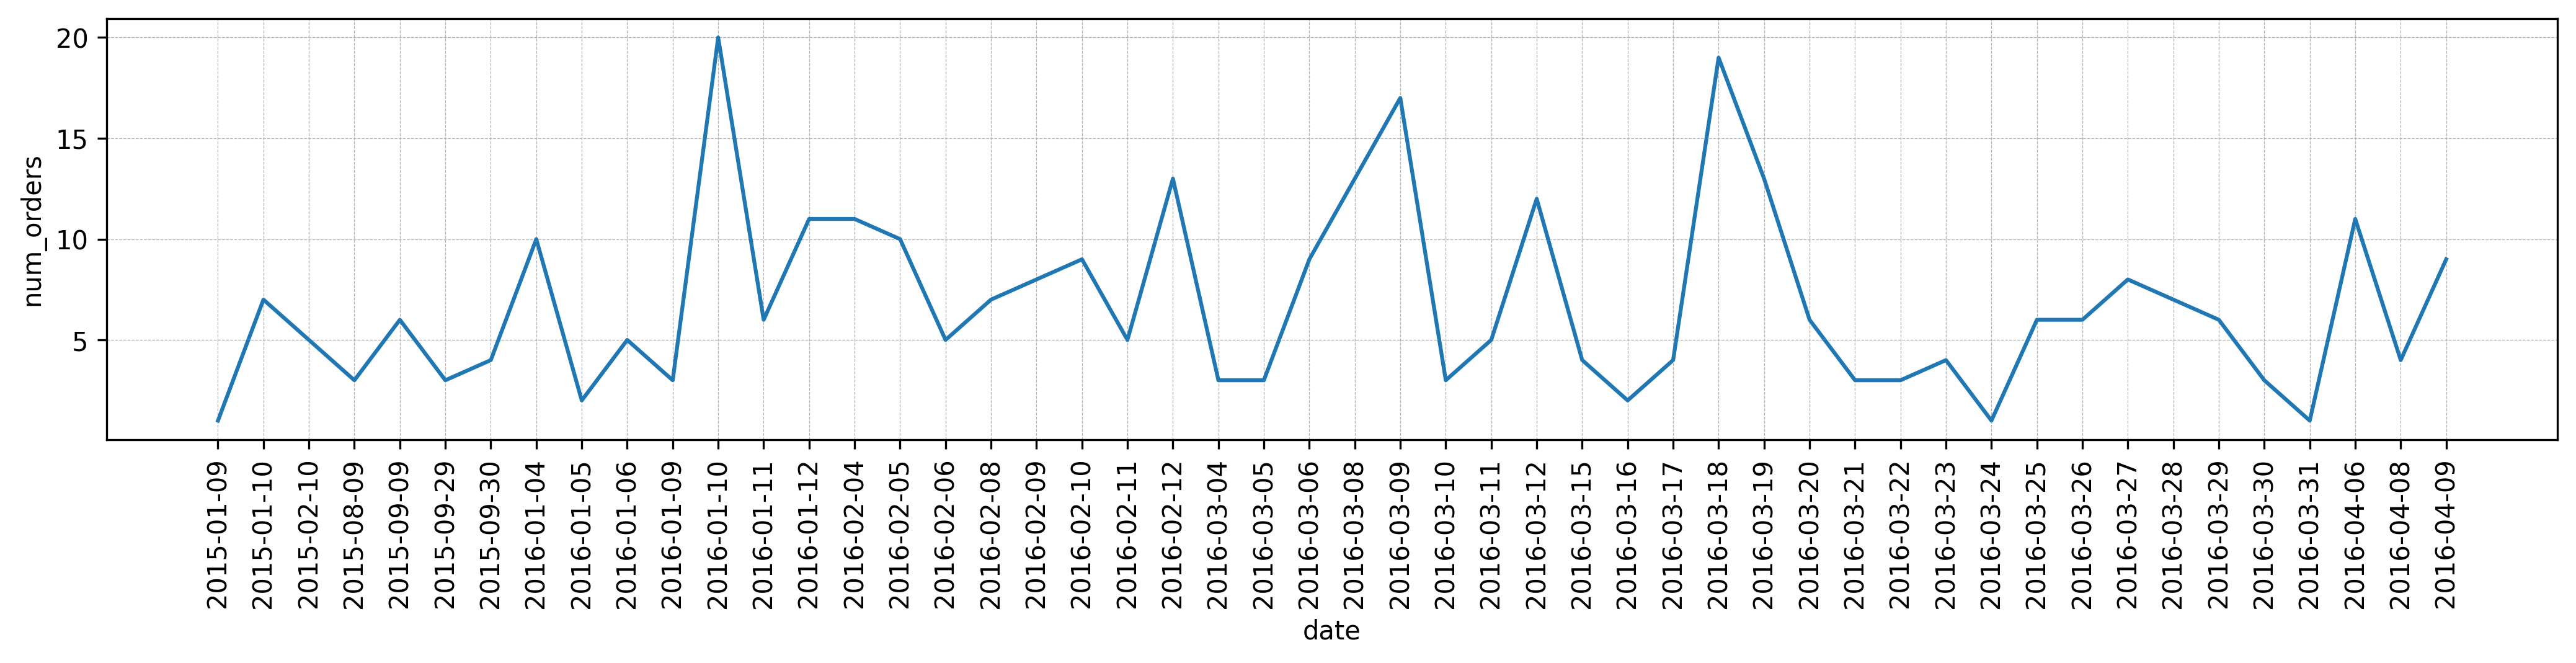

In [60]:
plt.rcParams.update({"figure.figsize":(17,3),"figure.dpi": 300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_orders.head(50), x='date', y='num_orders')
plt.grid(linestyle='--', linewidth=0.3)
ax.tick_params(axis='x',rotation = 90)

In [53]:
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


In [61]:
help(ax.tick_params)

Help on method tick_params in module matplotlib.axes._base:

tick_params(axis='both', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Change the appearance of ticks, tick labels, and gridlines.
    
    Parameters
    ----------
    axis : {'x', 'y', 'both'}, optional
        Which axis to apply the parameters to.
    
    Other Parameters
    ----------------
    axis : {'x', 'y', 'both'}
        Axis on which to operate; default is 'both'.
    reset : bool, default: False
        If *True*, set all parameters to defaults before processing other
        keyword arguments.
    which : {'major', 'minor', 'both'}
        Default is 'major'; apply arguments to *which* ticks.
    direction : {'in', 'out', 'inout'}
        Puts ticks inside the axes, outside the axes, or both.
    length : float
        Tick length in points.
    width : float
        Tick width in points.
    color : color
        Tick color.
    pad : float
        Distance in points between tick an

In [63]:
query = load_query("/content/weekly_orders.sql")

In [64]:
query

"WITH distinct_orders AS (\n\tSELECT DISTINCT\n\t\tnumber,\n\t\tDATE(date) AS date\n\tFROM orders\n)\n\nSELECT \n\tDATE(date, '1 DAYS', 'WEEKDAY 1', '-7 DAYS') AS week,\n\tCOUNT(*) AS num_orders \nFROM distinct_orders\nGROUP BY 1\nORDER BY 1"

In [65]:
weekly_orders = pysqldf(query)

In [66]:
weekly_orders

,week,num_orders
0,2015-01-05,8
1,2015-02-09,5
2,2015-08-03,3
3,2015-09-07,6
4,2015-09-28,7
...,...,...
191,2019-10-07,6
192,2019-10-28,25
193,2019-11-04,65
194,2019-11-25,24


In [67]:
weekly_orders.head()

,week,num_orders
0,2015-01-05,8
1,2015-02-09,5
2,2015-08-03,3
3,2015-09-07,6
4,2015-09-28,7


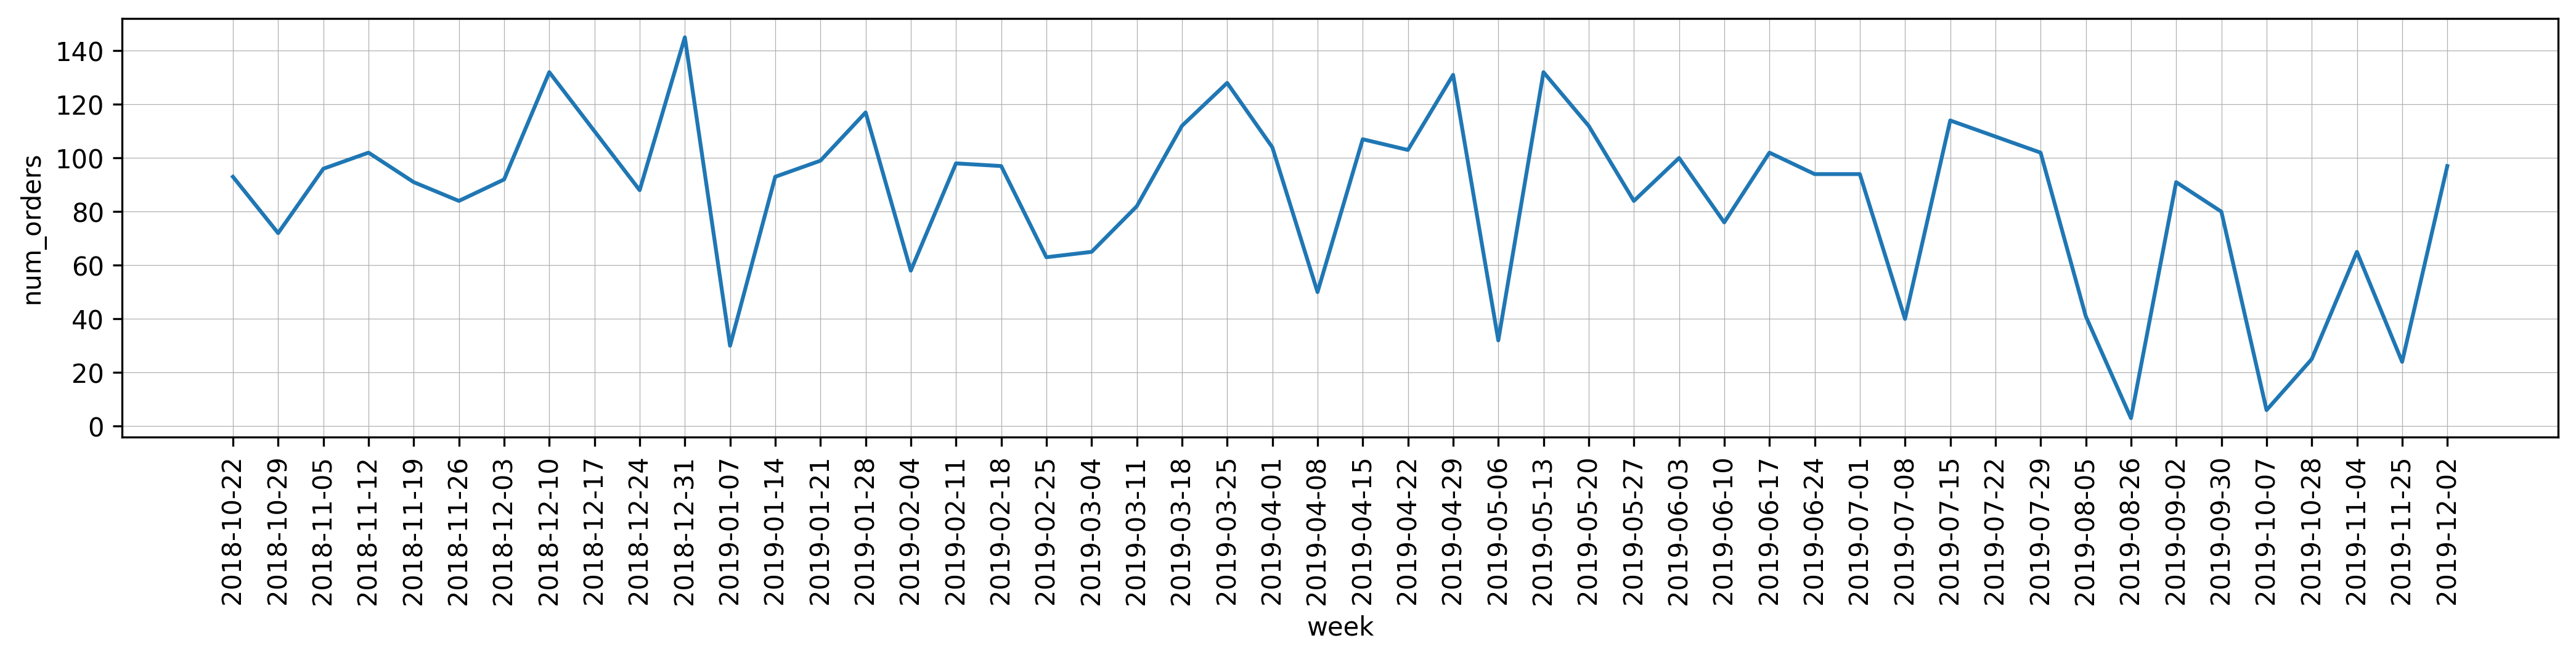

In [69]:
plt.rcParams.update({"figure.figsize":(17,3),'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data = weekly_orders.tail(50),x="week",y="num_orders")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [73]:
query = load_query('base.sql')
df = pysqldf(query)
df.to_csv('dataset.csv')

In [74]:
df

,week,order_count_7_day,order_count_30_day,label
0,2016-01-04,0,0,40
1,2016-01-11,40,40,17
2,2016-02-01,0,57,26
3,2016-02-08,26,66,42
4,2016-02-29,0,68,15
...,...,...,...,...
185,2019-09-30,0,94,80
186,2019-10-28,0,86,25
187,2019-11-04,25,60,65
188,2019-11-25,0,90,24
